## Week 1. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

**Peeking how to implement pdf function**

In [2]:
print(inspect.getsource(scipy.stats.norm._pdf))

print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



### Part 1. Plotting Likelihood, Prior, and Posterior

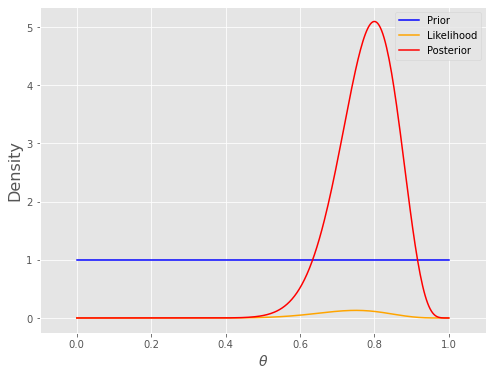

In [3]:
# Likelihood
n = 20
y = 15

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
a0 = 1
b0 = 1
prior = st.beta(a=a0, b=b0)

# Posterior
post = st.beta(a=a0+n, b=b0+(n-y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 원래는 likelihood 앞에 막 이렇게 곱하면 안되지만...
# 그래도 그 존재라도 알기 위해서... 0이 아니에요 ㅠㅡㅜ
plt.plot(thetas, (10**4)*likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Example 1 ) BDA p.37**

In [16]:
plt.rc('font', size=12)

# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y,n-y) = (437,543) and uniform prior Beta(1,1)
au = 10
bu = 10

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 9 + ap
bi = 9 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

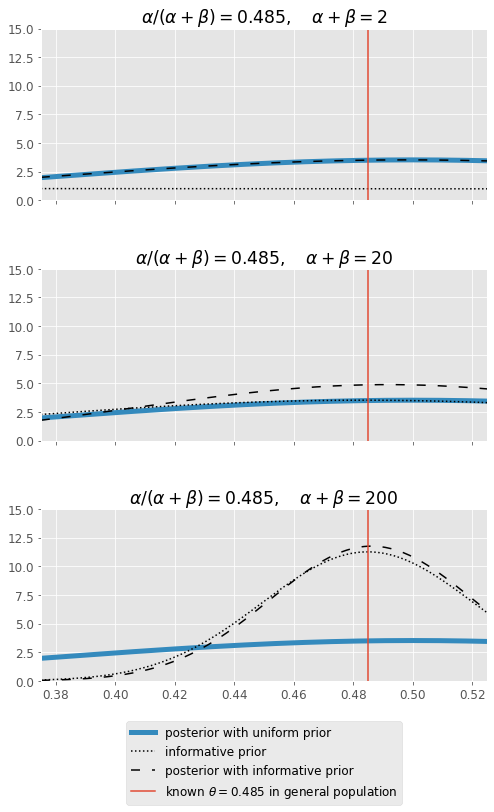

In [19]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,15))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

In [20]:
plt.rc('font', size=12)

# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y,n-y) = (437,543) and uniform prior Beta(1,1)
au = 1500
bu = 1500

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 1449 + ap
bi = 1449 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

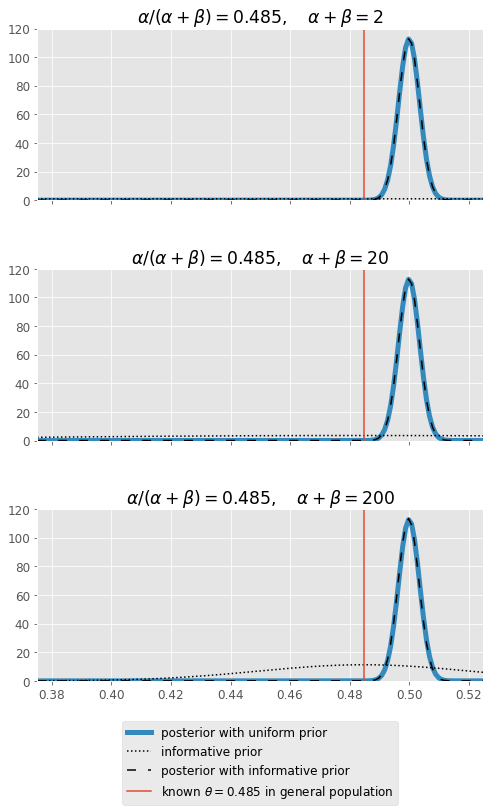

In [24]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,120))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  

- 이미 예제에서 Prior 에 대한 강함 중간 약함은 다 제시를 해 놓은듯? 그러므로 나는 그냥 data 만 고치면 될거같다.
- 위의 예시에서 posterior 의 a,b 를 고침으로서 data 의 likelihood의 확신도를 바꾸어놓았다. 

**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
 

- 파랑눈은 xx $p^2$ , getero 는 xX, Xx $2p(1-p)$  XX 는 brown eye #(1-p)^2$ 이때 각각의 gene 을 1/2로 물려준다
p(자식이 Xx | chiled 가 brown eye 이고 부모가 brown eye)  이때에 베이즈 정리에 따라서 각 값을 다르게 표현할 수 있다. p(A|B and C) = p(A,B,C) / p(B,C) # 이와 같이 계산 가능
각 값을 계산한 이후에 경우의수를 나누어 더해주면 된다.  
분모는 각각 경우의 수 Xx xX XX ... 를 나누어서 그 확률을 모두 더해주면 되는것이고, 분자의 경우도 그 경우를 나누어서 계산해주면된다. 
2p(1-p) + 2p^2 / (1-p)^2 + 4p(1+p) + 3p^2 = 2p/ 1+2p
 


- p( 주디는 Xx/xX |주디는 갈색눈동자, brwon eyed parents, 결혼은 Xx/xX 그리고 자식 N 명은 다 Brown)  이 상황에서는 우선 부모가 갈색눈동자일때 자식이 hetero 인 확률은 위에서 구했다. 그 확률을 이용한다면 {2p/(1+2P) (4/3)^(n)}^n / (2p/1+2p)(3/4)^2 + 1/1+2p


**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

- alpha , beta 를 잘 잡아야할듯. 하지만 '다른병원' 이여서 population 이 이미 다름. 그래서 굳이 prior 를 정확하게 줄 필요는 없을거라는 생각. 그래서 어느정도 높게는 설정하되 그 확신은 적은.. beta(9,2)?

- 지금 데이터가 Exchagable 한지 아닌지를 좀더 파보고싶긴한데 어쩃든 지금은 베이즈를 적용하는게 목적이므로 그냥 진행하도록 하겟습니다. Binomial 이니까 conjugate 를 적용하면 posterior 는 beta(a,b) + binomial data(n = 10, success = 10) -> beta(a+10,b+10-10) 이 된다. 이는 내 확신에서 업데이트가 되면 beta(19,2)

- 베이즈는 무조건 분포로 나온다. 베이지안 Approch 답게 그냥 분포로 내고싶은데. Binomial 데이터라 그냥 분포로 낸다 쳐도, 그 값이 다 예측값이 된다.. 그러므로 예측값은 a+10 / a+b+10 -> 19 / 21 이다. 

- 20명 환자중 2명이상 사망할 확률은 각각이 Binomial 데이터 이므로 각각의 X ~ B(19/21) 인 상태애서 1 - 1명사망확률 - 아무도 안죽을 확률 을 하면 된다. 1 - 20C1 (19/21)^20 (2/21) - (19/21)^21 